# Introdução

Aqui iremos analisar a correlação e fazer a regressão linear e múltipla dos dados que captamos, limpamos e analisamos.

Vamos primeiro importar as bibliotecas que precisaremos.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import t

Agora vamos importar nossos dados já limpos.

In [2]:
url = 'https://raw.githubusercontent.com/FredericoBaker/Decisao-Imoveis-Scrapping/main/DecisaoImoveisLimpo.csv' # Mudar depois que subir para o GitHub
df = pd.read_csv(url)
df.head()

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
0,23807,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",127.63,0.0,2.0,2.0,1.0,3.0,NaN,NaN,1350000.0
1,23806,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",138.02,0.0,2.0,2.0,1.0,3.0,NaN,NaN,1450000.0
2,22922,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,0.0,2.0,2.0,1.0,2.0,NaN,NaN,915000.0
3,22918,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,0.0,2.0,2.0,1.0,2.0,NaN,NaN,883000.0
4,22917,"Área privativa à venda, Carmo - Belo Horizonte/MG",Área privativa,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",107.38,0.0,2.0,2.0,1.0,2.0,NaN,NaN,1226000.0


# Tratamento dos Dados

Diferentes tipos de imóveis (Sítios, Casas, Apartamentos...) possuem diferentes relações entre suas características. Visto isso, focaremos em um desses tipos para que as análises feitas aqui sejam mais assertivas. No caso dessa parte usaremos os dados de Apartamentos.

In [3]:
dfResidencial = df[df['Tipo Imóvel'].isin(['Apartamento'])]
dfResidencial = dfResidencial.reset_index(drop = True) # Refaz os índices
dfResidencial.head()

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
0,22922,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,0.0,2.0,2.0,1.0,2.0,NaN,NaN,915000.0
1,22918,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,0.0,2.0,2.0,1.0,2.0,NaN,NaN,883000.0
2,22883,"Apartamento 2 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"530,Rua Monte Alegre,Serra,Belo Horizonte",72.00,0.0,2.0,2.0,2.0,2.0,NaN,NaN,700000.0
3,23396,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"131,Rua Serranos,Serra,Belo Horizonte",220.00,0.0,4.0,2.0,2.0,4.0,1246.23,2850.0,1890000.0
4,18588,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"204,Rua Henrique Passini,Serra,Belo Horizonte",136.39,0.0,4.0,3.0,2.0,4.0,NaN,NaN,1944300.0


### Remoção de dados não relevantes

Um dos apartamentos possui área interna de $2430,74 m^2$, o que não é coerente com a realidade. Na verdade, o imóvel com esse código (22006) não existe mais no site da Decisão Imóveis, indicando que possivelmente esse foi dado errôneo. Por isso, o excluiremos.



In [4]:
dfResidencial[dfResidencial['Área interna'] == dfResidencial['Área interna'].max()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
591,22006,"Apartamento 4 Quartos à venda, Funcionários - ...",Apartamento,Funcionários,"906,Rua Piaui,Funcionários,Belo Horizonte",2430.74,0.0,4.0,4.0,4.0,4.0,NaN,NaN,5666000.0


In [5]:
dfResidencial = dfResidencial.drop(dfResidencial[dfResidencial['Área interna'] == dfResidencial['Área interna'].max()].index)
dfResidencial[dfResidencial['Área interna'] == dfResidencial['Área interna'].max()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
663,23343,"Apartamento 5 Quartos à venda, Anchieta - Belo...",Apartamento,Anchieta,"1601,Rua Pium-I,Anchieta,Belo Horizonte",789.0,0.0,5.0,7.0,5.0,5.0,3658.98,10000.0,7000000.0


Vamos também eliminar a coluna de código, uma vez que ela não terá utilidade nessa parte do trabalho.

In [6]:
dfResidencial = dfResidencial.drop('Código', axis=1)
dfResidencial.head()

,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
0,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,0.0,2.0,2.0,1.0,2.0,NaN,NaN,915000.0
1,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,0.0,2.0,2.0,1.0,2.0,NaN,NaN,883000.0
2,"Apartamento 2 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"530,Rua Monte Alegre,Serra,Belo Horizonte",72.00,0.0,2.0,2.0,2.0,2.0,NaN,NaN,700000.0
3,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"131,Rua Serranos,Serra,Belo Horizonte",220.00,0.0,4.0,2.0,2.0,4.0,1246.23,2850.0,1890000.0
4,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"204,Rua Henrique Passini,Serra,Belo Horizonte",136.39,0.0,4.0,3.0,2.0,4.0,NaN,NaN,1944300.0


### Informações sobre os dados

Aqui estão algumas informações sobre nossos dados:

In [7]:
dfResidencial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1155
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Título          1155 non-null   object 
 1   Tipo Imóvel     1155 non-null   object 
 2   Bairro          1155 non-null   object 
 3   Endereço        1155 non-null   object 
 4   Área interna    1155 non-null   float64
 5   Área externa    1155 non-null   float64
 6   # de quartos    1155 non-null   float64
 7   # de banheiros  1155 non-null   float64
 8   # de suítes     1155 non-null   float64
 9   # de vagas      1155 non-null   float64
 10  IPTU            826 non-null    float64
 11  Condomínio      861 non-null    float64
 12  Preço           1155 non-null   float64
dtypes: float64(9), object(4)
memory usage: 126.3+ KB


Aqui estão algumas estatísticas dos nossos dados:

In [8]:
dfResidencial.describe()

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,826.000000,861.000000,1.155000e+03
mean,122.862199,1.121437,3.115152,2.277922,1.259740,2.102165,479.092712,1203.291429,1.189397e+06
std,68.635236,19.320784,0.868117,0.793052,0.773297,0.966485,395.477998,866.579336,8.259208e+05
min,24.110000,0.000000,1.000000,1.000000,0.000000,0.000000,15.690000,164.000000,2.200000e+05
25%,75.000000,0.000000,3.000000,2.000000,1.000000,2.000000,200.385000,550.000000,6.000000e+05
50%,102.920000,0.000000,3.000000,2.000000,1.000000,2.000000,364.670000,950.000000,9.750000e+05
75%,156.925000,0.000000,4.000000,3.000000,2.000000,3.000000,624.610000,1600.000000,1.500000e+06
max,789.000000,599.300000,5.000000,7.000000,5.000000,8.000000,3658.980000,10000.000000,7.800000e+06


# Covariância

Aqui iremos calcular a covariância para podermos ter uma ideia de como as diferentes características se relacionam.

In [9]:
matrizDeCovariancia = dfResidencial.cov(numeric_only = True)
matrizDeCovariancia

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
Área interna,4.710796e+03,1.812539e+02,41.729443,34.504952,28.804160,39.125988,2.061350e+04,4.742328e+04,4.189522e+07
Área externa,1.812539e+02,3.732927e+02,0.730692,0.333378,0.389280,0.801240,6.101238e+02,1.144346e+03,1.123679e+06
# de quartos,4.172944e+01,7.306922e-01,0.753626,0.406444,0.259493,0.479560,1.560222e+02,3.693095e+02,3.866184e+05
# de banheiros,3.450495e+01,3.333784e-01,0.406444,0.628932,0.451147,0.480247,2.089523e+02,4.296926e+02,4.560452e+05
# de suítes,2.880416e+01,3.892797e-01,0.259493,0.451147,0.597988,0.471708,2.218776e+02,4.321122e+02,4.678820e+05
# de vagas,3.912599e+01,8.012395e-01,0.479560,0.480247,0.471708,0.934094,3.025065e+02,6.136321e+02,5.829128e+05
IPTU,2.061350e+04,6.101238e+02,156.022179,208.952331,221.877600,302.506534,1.564028e+05,2.932924e+05,2.979173e+08
Condomínio,4.742328e+04,1.144346e+03,369.309545,429.692586,432.112166,613.632130,2.932924e+05,7.509597e+05,6.028177e+08
Preço,4.189522e+07,1.123679e+06,386618.436663,456045.204621,467881.998964,582912.803599,2.979173e+08,6.028177e+08,6.821452e+11


# Correlação de Pearson

Aqui iremos calcular a correlação de Pearson para podermos ter uma ideia de como as diferentes características se relacionam.

In [10]:
matrizDeCorrPearson = dfResidencial.corr(method='pearson', numeric_only = True)
matrizDeCorrPearson

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
Área interna,1.000000,0.136683,0.700354,0.633917,0.542703,0.589825,0.718091,0.770873,0.739059
Área externa,0.136683,1.000000,0.043564,0.021758,0.026055,0.042908,0.067698,0.059113,0.070417
# de quartos,0.700354,0.043564,1.000000,0.590365,0.386546,0.571570,0.500039,0.534532,0.539220
# de banheiros,0.633917,0.021758,0.590365,1.000000,0.735648,0.626567,0.653828,0.613445,0.696254
# de suítes,0.542703,0.026055,0.386546,0.735648,1.000000,0.631148,0.743377,0.656597,0.732574
# de vagas,0.589825,0.042908,0.571570,0.626567,0.631148,1.000000,0.745833,0.693508,0.730247
IPTU,0.718091,0.067698,0.500039,0.653828,0.743377,0.745833,1.000000,0.848018,0.904348
Condomínio,0.770873,0.059113,0.534532,0.613445,0.656597,0.693508,0.848018,1.000000,0.832168
Preço,0.739059,0.070417,0.539220,0.696254,0.732574,0.730247,0.904348,0.832168,1.000000


## Mapa de Calor da Correlação de Pearson

Aqui iremos fazer uma visualização mais intuitiva das correlações de Pearson entre as características dos imóveis.

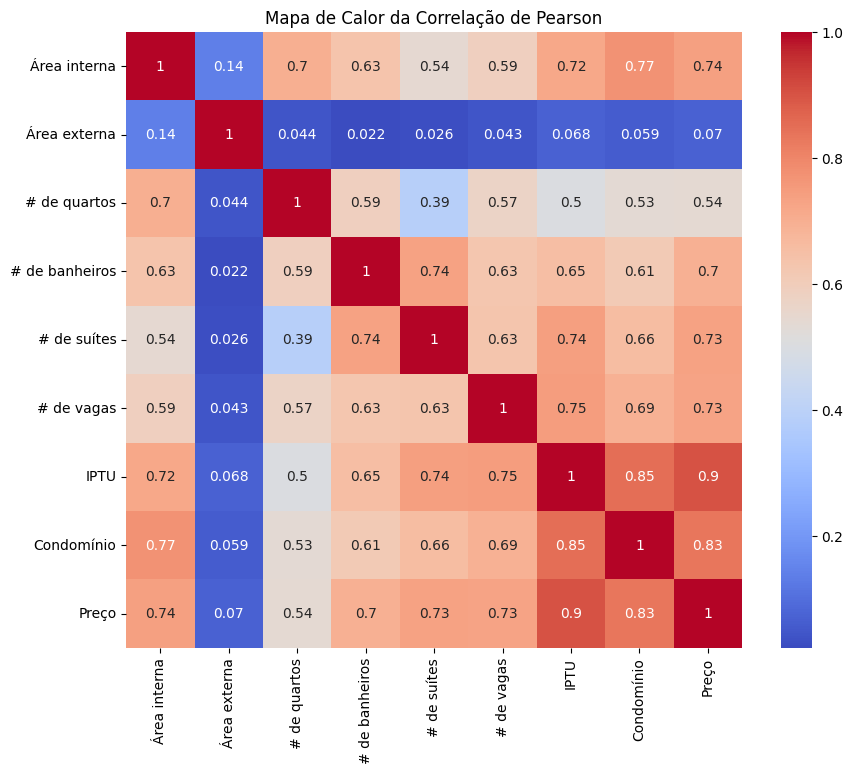

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrizDeCorrPearson, annot=True, cmap='coolwarm', square=True)
plt.title('Mapa de Calor da Correlação de Pearson')
plt.show()

# Pair Plot

Agora vamos plotar os dados para ver como se distribuem quando analisamos diferentes pares de características dos imóveis. Vamos aproveitar e já adicionar uma regressão linear para cada par para podermos analisar as tendências dos dados.

In [12]:
#sns.pairplot(dfResidencial, kind='reg')
#plt.show()

# Correlação de Postos de Spearman

Aqui iremos calcular a correlação de postos de Spearman para podermos ter uma ideia de como as diferentes características se relacionam.

In [13]:
matrizDeCorrPostosDeSpearman = dfResidencial.corr(method='spearman', numeric_only = True)
matrizDeCorrPostosDeSpearman

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
Área interna,1.000000,0.001406,0.888030,0.653632,0.490267,0.622978,0.682605,0.695488,0.710212
Área externa,0.001406,1.000000,-0.006331,-0.026616,-0.000007,-0.046644,-0.056446,-0.061933,-0.009323
# de quartos,0.888030,-0.006331,1.000000,0.606382,0.409517,0.604978,0.616155,0.602284,0.629381
# de banheiros,0.653632,-0.026616,0.606382,1.000000,0.729827,0.642857,0.611394,0.546498,0.678201
# de suítes,0.490267,-0.000007,0.409517,0.729827,1.000000,0.651594,0.686645,0.581182,0.686653
# de vagas,0.622978,-0.046644,0.604978,0.642857,0.651594,1.000000,0.788071,0.682178,0.788175
IPTU,0.682605,-0.056446,0.616155,0.611394,0.686645,0.788071,1.000000,0.843012,0.926570
Condomínio,0.695488,-0.061933,0.602284,0.546498,0.581182,0.682178,0.843012,1.000000,0.829075
Preço,0.710212,-0.009323,0.629381,0.678201,0.686653,0.788175,0.926570,0.829075,1.000000


## Mapa de Calor da Correlação de Postos de Spearman

Aqui iremos fazer uma visualização mais intuitiva das correlações de Postos de Spearman entre as características dos imóveis.

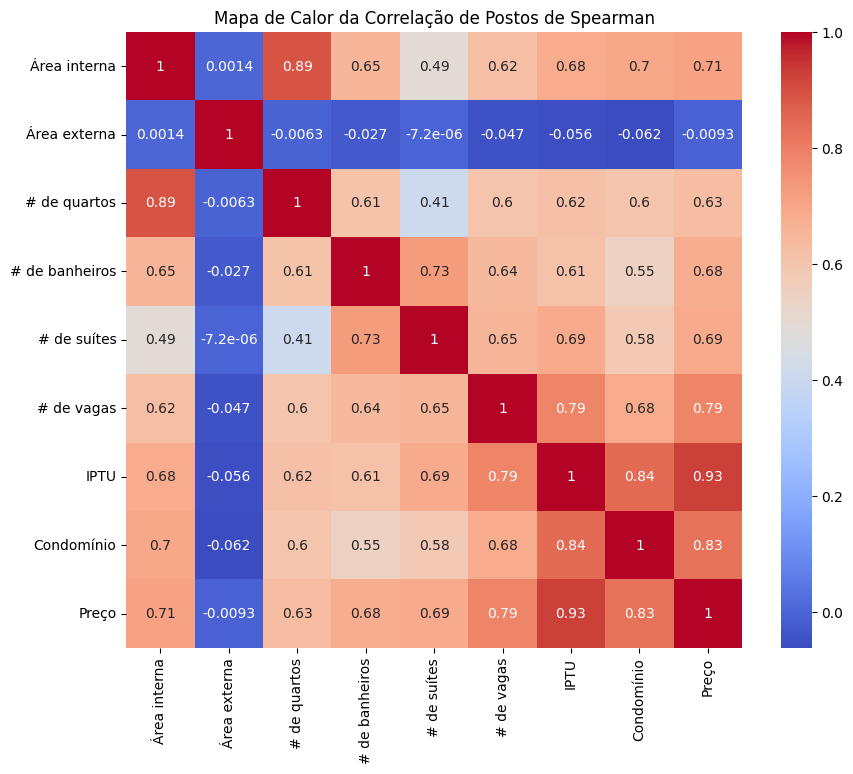

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrizDeCorrPostosDeSpearman, annot=True, cmap='coolwarm', square=True)
plt.title('Mapa de Calor da Correlação de Postos de Spearman')
plt.show()

# P-Valor da Correlação (usando método de t-statistics)

Aqui iremos calcular os p-valores das correlações de Pearson usando o método de t-statistics.

In [15]:
n = matrizDeCorrPearson.shape[0]
columns = matrizDeCorrPearson.columns

# calcula espaçamento
max_width = max(max(len(column) for column in columns), 10) + 2
p_value_width = 3

# printa header da matriz com colunas
header = "".rjust(max_width) + "".join(column.ljust(max_width + p_value_width) for column in columns)
print(header)

# para cada linha da matriz de correlação de Pearson
for i in range(n):

    # adiciona nome da coluna para ser printado
    row = columns[i].ljust(max_width)

    # para cada coluna da matriz de correlação de Pearson
    for j in range(n):

        # se não for um elemento da diagonal principal da matriz
        if i != j:

            # calcula o t-score
            t_stat = matrizDeCorrPearson.iloc[i, j] * np.sqrt((n - 2) / (1 - matrizDeCorrPearson.iloc[i, j] ** 2))

            # calcula o p-valor
            p_value = 2 * (1 - abs(t.cdf(t_stat, df=n-2)))

            # formata o p-valor para 4 casas decimais
            p_value_formatted = f"{p_value:.4f}"


            # adiciona pvalor para ser printado
            row += p_value_formatted.ljust(max_width + p_value_width)

        else:

            # adiciona espaço de pvalor em branco para ser printado
            row += "".ljust(max_width + p_value_width)

    # print a row atual
    print(row)


                Área interna       Área externa       # de quartos       # de banheiros     # de suítes        # de vagas         IPTU               Condomínio         Preço              
Área interna                       0.7258             0.0356             0.0668             0.1311             0.0946             0.0293             0.0150             0.0229             
Área externa    0.7258                                0.9114             0.9557             0.9470             0.9127             0.8626             0.8799             0.8571             
# de quartos    0.0356             0.9114                                0.0942             0.3041             0.1079             0.1704             0.1382             0.1341             
# de banheiros  0.0668             0.9557             0.0942                                0.0239             0.0710             0.0561             0.0789             0.0372             
# de suítes     0.1311             0.9470             0.3041

# Redimensionamento dos Dados (Z-Normalização)

Aqui vamos redimensionar os dados para a regressão linear.

In [16]:
# criamos um novo dataframe para armazenar os dados redimensionados
dfNormalized = pd.DataFrame()

# selecionamos apenas colunas numericas para redimensionamento
numericColumns = dfResidencial.select_dtypes(include=np.number).columns

# calculamos a media e o desvio padrao das colunas numericas
means = dfResidencial[numericColumns].mean()
stds = dfResidencial[numericColumns].std()

# z normalizamos as colunas numericas e armazenamos no nosso novo dataframe
dfNormalized[numericColumns] = (dfResidencial[numericColumns] - means) / stds

dfNormalized.head()

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
0,-0.860377,-0.058043,-1.284564,-0.350446,-0.335887,-0.105707,NaN,NaN,-0.332232
1,-0.841582,-0.058043,-1.284564,-0.350446,-0.335887,-0.105707,NaN,NaN,-0.370977
2,-0.741051,-0.058043,-1.284564,-0.350446,0.957278,-0.105707,NaN,NaN,-0.592548
3,1.415276,-0.058043,1.019274,-0.350446,0.957278,1.963646,1.939772,1.90024,0.848268
4,0.197097,-0.058043,1.019274,0.910505,0.957278,1.963646,NaN,NaN,0.914013


Aqui estão algumas estatísticas dos nossos dados depois do redimensionamento. Perceba que a z-normalização ocorreu com sucesso, já que o desvio padrão de todas as colunas é 1 e a média é aproximadamente 0.

In [17]:
dfNormalized.describe()

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
count,1.155000e+03,1.155000e+03,1.155000e+03,1.155000e+03,1.155000e+03,1.155000e+03,8.260000e+02,8.610000e+02,1.155000e+03
mean,-3.445056e-16,1.845566e-17,-9.843016e-17,1.230377e-17,-1.045820e-16,4.306320e-17,1.204310e-16,-1.567980e-16,-4.306320e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.438797e+00,-5.804305e-02,-2.436483e+00,-1.611397e+00,-1.629052e+00,-2.175061e+00,-1.171753e+00,-1.199303e+00,-1.173717e+00
25%,-6.973415e-01,-5.804305e-02,-1.326452e-01,-3.504462e-01,-3.358869e-01,-1.057072e-01,-7.047363e-01,-7.538738e-01,-7.136246e-01
50%,-2.905534e-01,-5.804305e-02,-1.326452e-01,-3.504462e-01,-3.358869e-01,-1.057072e-01,-2.893276e-01,-2.922888e-01,-2.595859e-01
75%,4.962874e-01,-5.804305e-02,1.019274e+00,9.105051e-01,9.572778e-01,9.289695e-01,3.679529e-01,4.577868e-01,3.760682e-01
max,9.705478e+00,3.096037e+01,2.171193e+00,5.954310e+00,4.836772e+00,6.102353e+00,8.040617e+00,1.015107e+01,8.003918e+00


# Regressão Linear Simples de Dois a Dois

Agora vamos usar o pair plot novamente para fazermos a regressão linear para cada par de características dos imóveis, porém com os dados redimensionados.

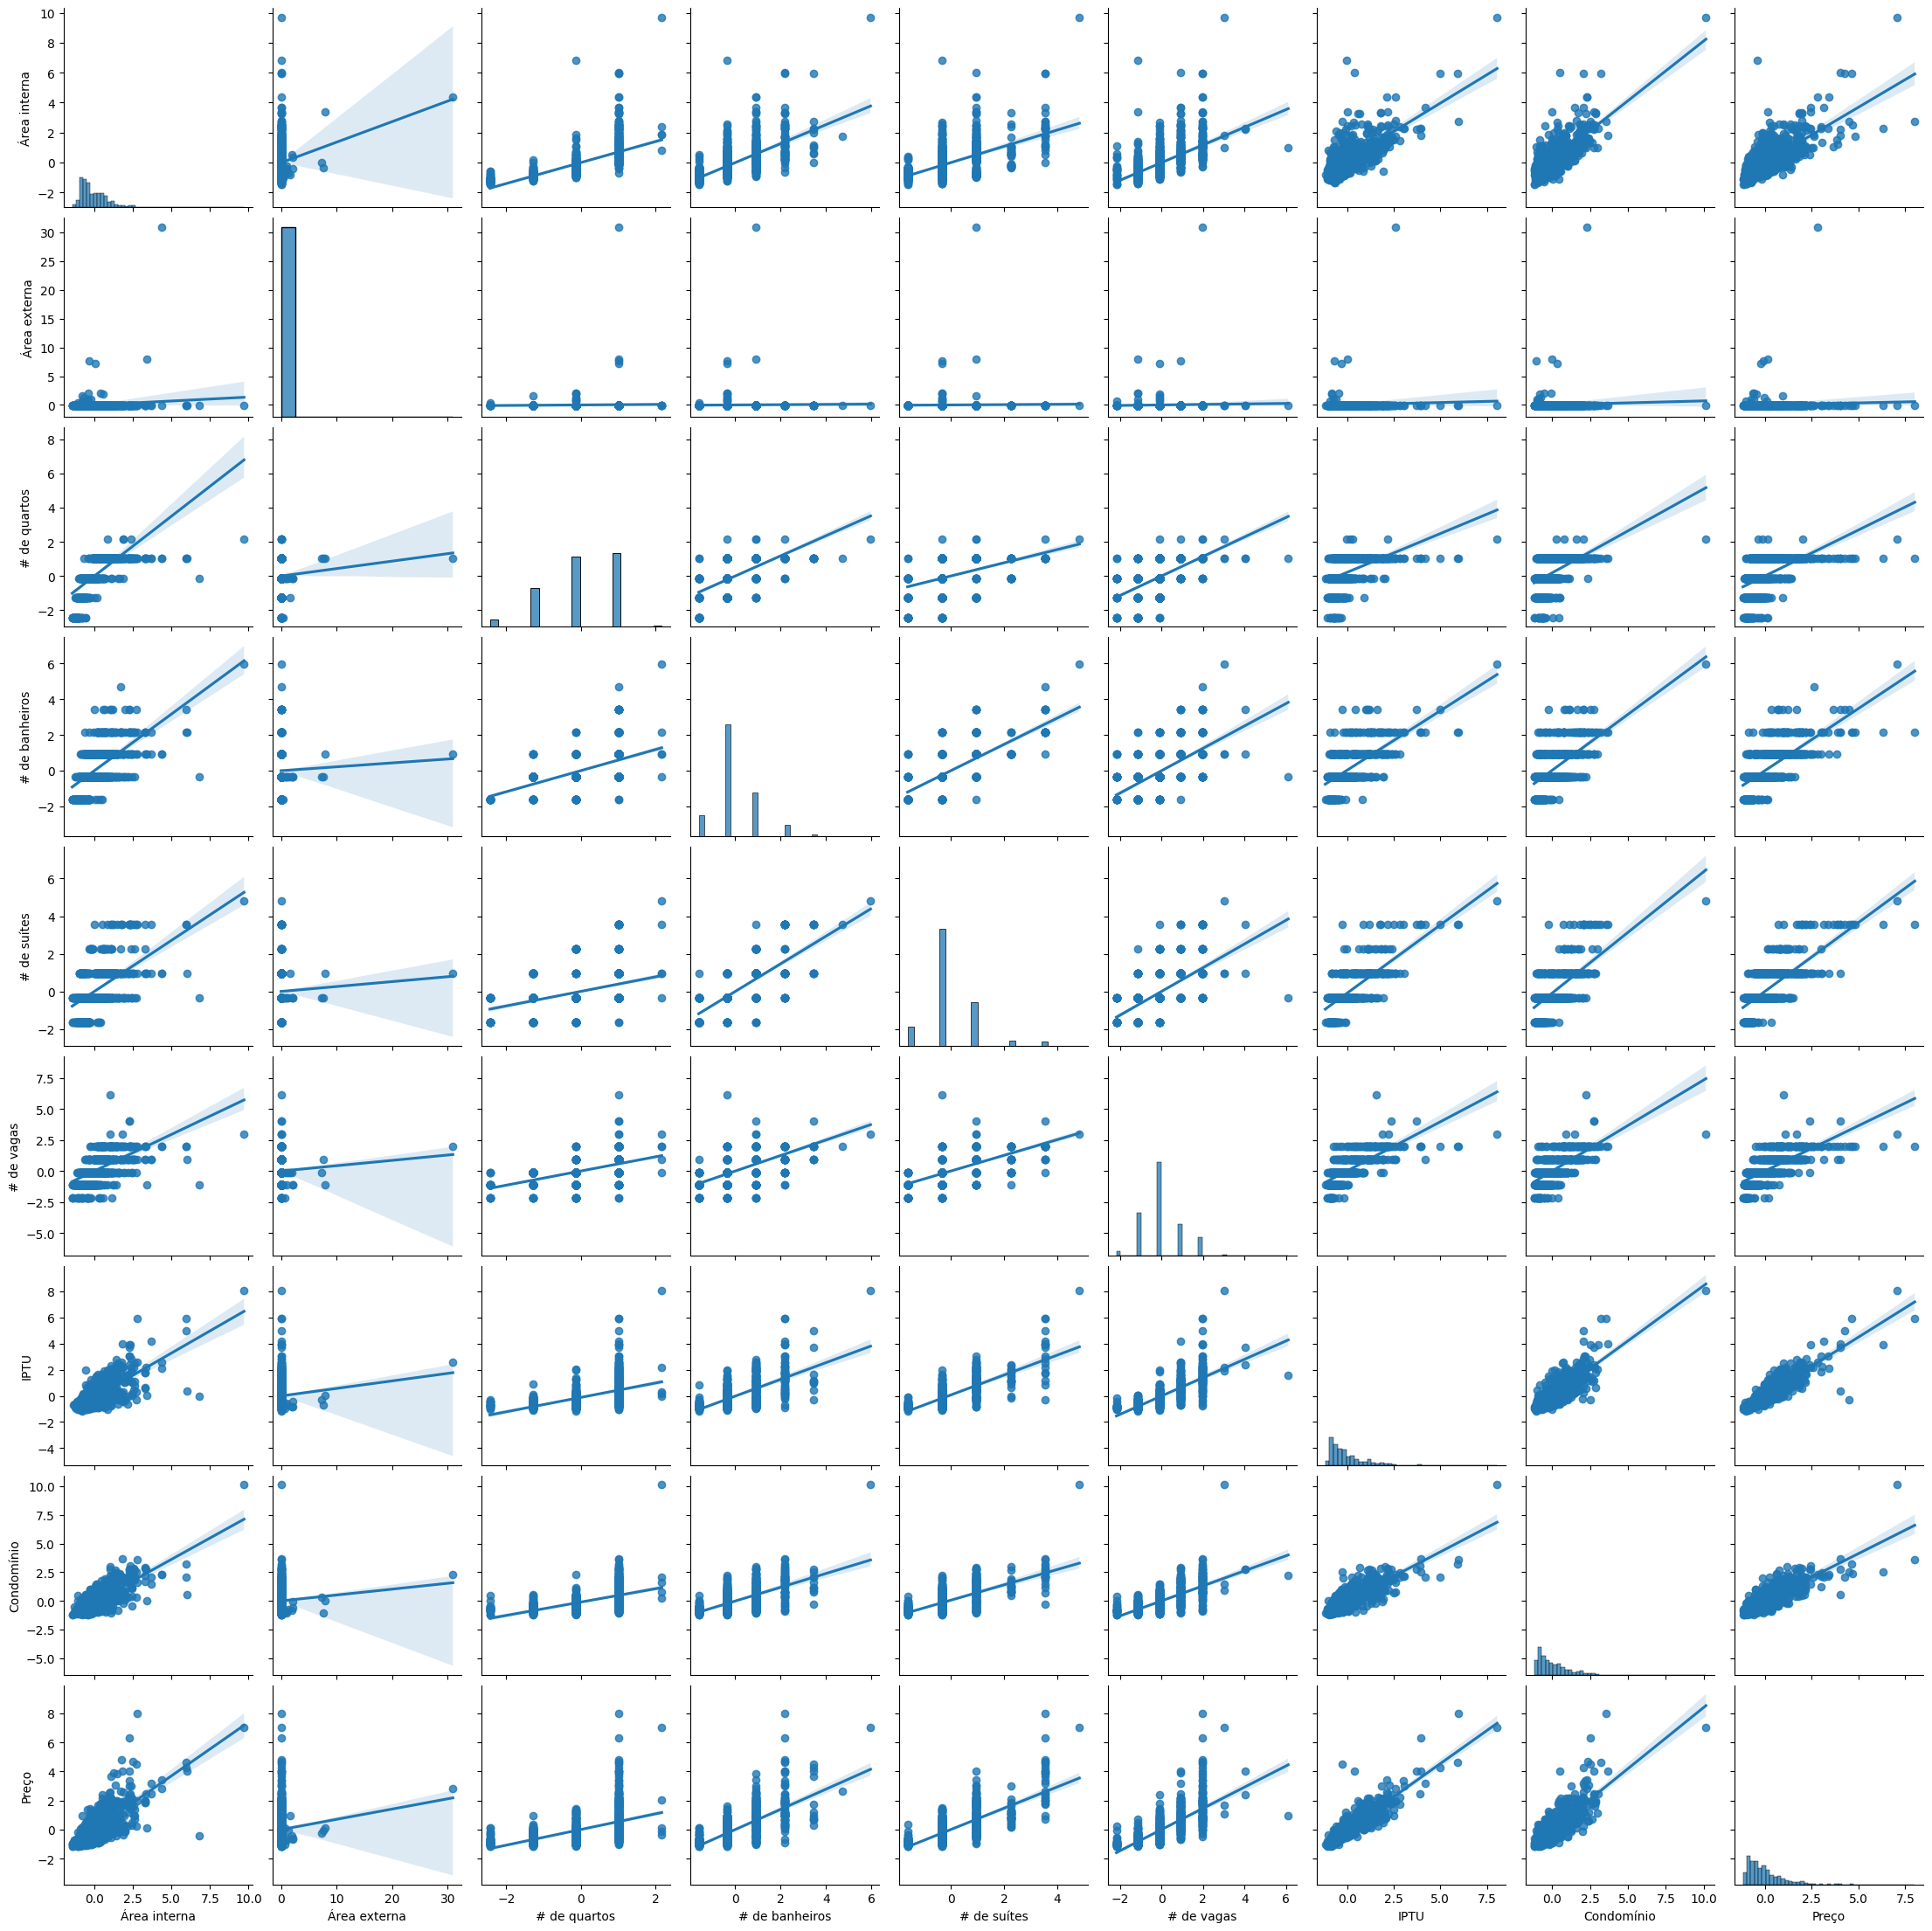

In [18]:
#sns.pairplot(dfNormalized, kind='reg')
#plt.show()

Veja que a precisão dessas regressões está diretamente ligada às correlações de Pearson entre as diferentes características dos imóveis.

OBS.: Também é relevante observar que a normaização dos dados não altera a correlação de Pearson.

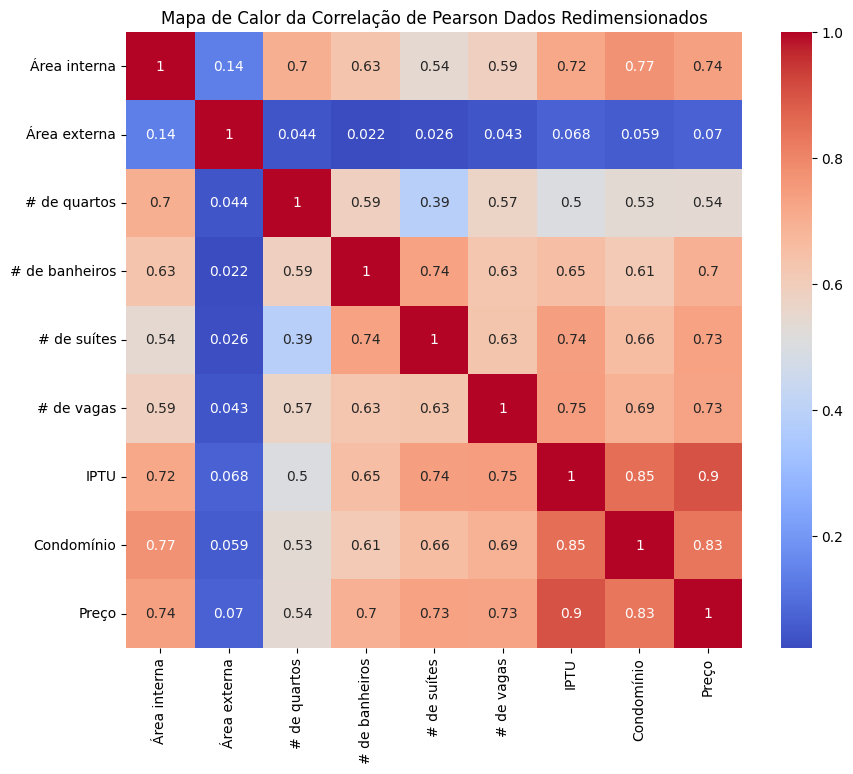

In [19]:
matrizDeCorrPearsonRedimens = dfNormalized.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(matrizDeCorrPearsonRedimens, annot=True, cmap='coolwarm', square=True)
plt.title('Mapa de Calor da Correlação de Pearson Dados Redimensionados')
plt.show()

Assim, vamos analisar mais profundamente as seguintes regressões:


1.   Preço e Área interna
2.   Preço e IPTU
3.   Preço e Condomínio



## Regressão Linear Preço e Área Interna

Vamos gerar o gráfico da regressão linear para a área interna e o preço dos imóveis.

In [20]:
nomeColX = 'Área interna'
nomeColY = 'Preço'

Agora vamos encontrar os parâmetros alpha e beta do modelo ótimo de regressão linear.

In [21]:
# atributo que queremos prever
precoY = dfNormalized[nomeColY].values.reshape(-1, 1)
# atributo que influencia o atributo que queremos prever
arIntX = dfNormalized[nomeColX].values.reshape(-1, 1)

# encontra o modelo de regressão linear ótima para os dados
modeloArIntVSPreco = LinearRegression()
modeloArIntVSPreco.fit(arIntX, precoY)

# encontra os parâmetros do nosso modelo
alpha = modeloArIntVSPreco.intercept_[0]
beta = modeloArIntVSPreco.coef_[0][0]

print("Alpha =", alpha)
print("Beta =", beta)

Alpha = 2.1154663282525824e-16
Beta = 0.7390586740857311


Agora vamos plotar nosso modelo sobre nossos dados.

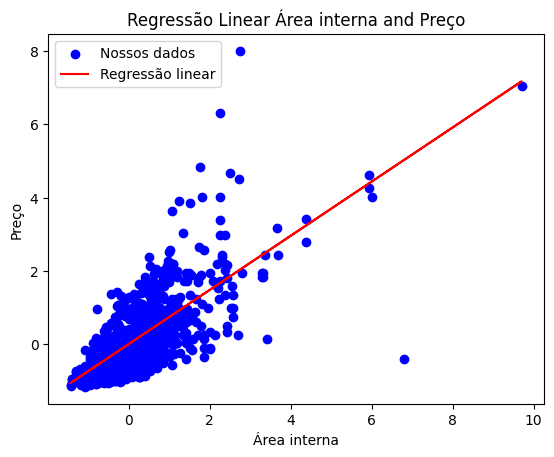

In [22]:
predicaoPreco = modeloArIntVSPreco.predict(arIntX)

plt.scatter(arIntX, precoY, color='blue', label='Nossos dados')
plt.plot(arIntX, predicaoPreco, color='red', label='Regressão linear')
plt.xlabel(nomeColX)
plt.ylabel(nomeColY)
plt.title('Regressão Linear ' + nomeColX + ' and ' + nomeColY)
plt.legend()
plt.show()

Aqui vamos calcular o loss do nosso modelo.

In [23]:
# calcula loss
loss = np.sum((precoY - predicaoPreco) ** 2)
print("Loss =", loss)

Loss = 523.6762868024721


Aqui vamos calcular o erro quadrado médio

In [24]:
# calcula erro medio quadrado
EMQ = np.mean((precoY - predicaoPreco) ** 2)
print("Erro Médio Quadrado =", EMQ)

Erro Médio Quadrado = 0.45339938251296286


Aqui vamos calcular o Rˆ2 do nosso modelo

In [25]:
R2 = modeloArIntVSPreco.score(arIntX, precoY)
print("R² =", R2)

R² = 0.5462077237413587


Vamos testar na pratica o quão bem esse modelo prevê preços de apartamentos baseado em sua área. Para tanto, coletamos informações de 5 apartamentos do site Viva Real, os quais estão expostos abaixo.

In [26]:
dadosVivaReal = {'Área': [45, 64, 84, 107, 133],
                 'Preço Real': [495000, 949000, 750000, 1140000, 2112000]}

dadosVivaReal = pd.DataFrame(dadosVivaReal)

dadosVivaReal

,Área,Preço Real
0,45,495000
1,64,949000
2,84,750000
3,107,1140000
4,133,2112000


In [27]:
def predictPreco(area):
  meanREsX = dfResidencial[nomeColX].mean()
  stdREsX = dfResidencial[nomeColX].std()

  normalizedValue = (area - meanREsX) / stdREsX

  precoResult = normalizedValue * beta + alpha

  meanREsY = dfResidencial[nomeColY].mean()
  stdREsY = dfResidencial[nomeColY].std()

  return round(precoResult * stdREsY + meanREsY)

dadosVivaReal['Preço Previsto'] = predictPreco(dadosVivaReal['Área'])
dadosVivaReal

,Área,Preço Real,Preço Previsto
0,45,495000,496934.0
1,64,949000,665909.0
2,84,750000,843778.0
3,107,1140000,1048328.0
4,133,2112000,1279557.0


## Regressão Linear Preço e IPTU

Vamos gerar o gráfico da regressão linear para a IPTU e o preço dos imóveis

In [28]:
nomeColX = 'IPTU'
nomeColY = 'Preço'

Teremos que fazer algumas alterações antes de continuarmos. Veja que os nossos dados de IPTU possuem valores NaN.

In [29]:
dfNormalized[dfNormalized[nomeColX].isna()]

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
0,-0.860377,-0.058043,-1.284564,-0.350446,-0.335887,-0.105707,NaN,NaN,-0.332232
1,-0.841582,-0.058043,-1.284564,-0.350446,-0.335887,-0.105707,NaN,NaN,-0.370977
2,-0.741051,-0.058043,-1.284564,-0.350446,0.957278,-0.105707,NaN,NaN,-0.592548
4,0.197097,-0.058043,1.019274,0.910505,0.957278,1.963646,NaN,NaN,0.914013
5,0.218515,-0.058043,1.019274,0.910505,0.957278,0.928970,NaN,NaN,0.838946
...,...,...,...,...,...,...,...,...,...
1148,-0.609923,-0.058043,-0.132645,-0.350446,-0.335887,-0.105707,NaN,NaN,-0.338286
1149,-0.821476,-0.058043,-1.284564,-0.350446,0.957278,-0.105707,NaN,NaN,-0.217209
1150,-0.856298,-0.058043,-1.284564,-0.350446,-0.335887,-0.105707,NaN,NaN,-0.493636
1151,-0.669805,-0.058043,-0.132645,-0.350446,-0.335887,-1.140384,NaN,NaN,-0.843721


Para podermos gerar nosso modelo de regressão linear será necessário dropar esses valores NaN.

In [30]:
newDfNormalized = dfNormalized.dropna(subset=[nomeColX])

newDfNormalized

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
3,1.415276,-0.058043,1.019274,-0.350446,0.957278,1.963646,1.939772,1.900240,0.848268
9,-0.303229,-0.058043,-0.132645,-0.350446,-0.335887,-1.140384,-0.960743,-0.926968,-0.919455
12,0.395392,-0.058043,1.019274,2.171456,0.957278,0.928970,0.255153,-0.176893,1.041992
13,0.369166,2.012266,-0.132645,-0.350446,-0.335887,-1.140384,-0.461322,-0.085776,-0.604655
14,-0.988737,-0.058043,-1.284564,-1.611397,-1.629052,-1.140384,-0.910045,-0.782723,-1.004209
...,...,...,...,...,...,...,...,...,...
1145,-0.324064,7.600031,1.019274,-0.350446,-0.335887,0.928970,-0.705710,-1.066598,-0.083056
1146,-0.420516,-0.058043,-0.132645,-0.350446,-0.335887,-0.105707,-0.422508,-0.475596,0.085483
1153,0.513115,-0.058043,-0.132645,-0.350446,-0.335887,1.963646,-0.403948,-0.928122,-0.304646
1154,-0.657420,-0.058043,-0.132645,-0.350446,-0.335887,-0.105707,-0.403948,-0.928122,-0.731786


Depois de limparmos os dados, poderemos ver que a correlação não se altera:

In [31]:
corrAntes = dfNormalized[nomeColY].corr(dfNormalized[nomeColX])
corrDepois = newDfNormalized[nomeColY].corr(newDfNormalized[nomeColX])

print('Correlação antes da limpeza =', corrAntes)
print('Correlação depois da limpeza =', corrDepois)

Correlação antes da limpeza = 0.9043479781270553
Correlação depois da limpeza = 0.9043479781270553


Agora vamos encontrar os parâmetros alpha e beta do modelo ótimo de regressão linear.

In [32]:
# atributo que queremos prever
preco2Y = newDfNormalized[nomeColY].values.reshape(-1, 1)
# atributo que influencia o atributo que queremos prever
iptuX = newDfNormalized[nomeColX].values.reshape(-1, 1)

# encontra o modelo de regressão linear ótima para os dados
modeloIptuVSPreco = LinearRegression()
modeloIptuVSPreco.fit(iptuX, preco2Y)

# encontra os parâmetros do nosso modelo
alpha = modeloIptuVSPreco.intercept_[0]
beta = modeloIptuVSPreco.coef_[0][0]

print("Alpha =", alpha)
print("Beta =", beta)

Alpha = -0.02048143613689389
Beta = 0.9120843751166678


Agora vamos plotar nosso modelo sobre nossos dados.

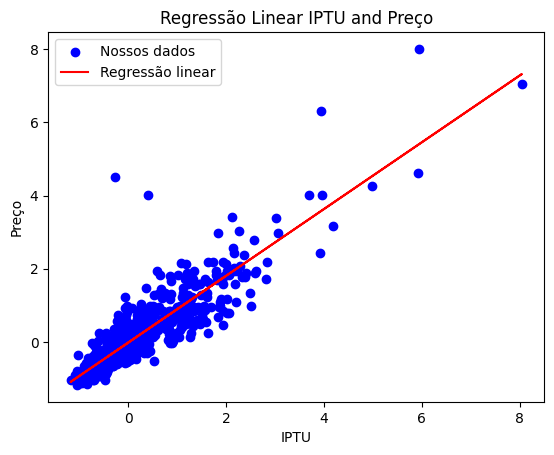

In [33]:
predicaoPreco2 = modeloIptuVSPreco.predict(iptuX)

plt.scatter(iptuX, preco2Y, color='blue', label='Nossos dados')
plt.plot(iptuX, predicaoPreco2, color='red', label='Regressão linear')
plt.xlabel(nomeColX)
plt.ylabel(nomeColY)
plt.title('Regressão Linear ' + nomeColX + ' and ' + nomeColY)
plt.legend()
plt.show()

Aqui vamos calcular o loss do nosso modelo.

In [34]:
# calcula loss
loss2 = np.sum((preco2Y - predicaoPreco2) ** 2)

print("Loss =", loss2)

Loss = 152.85980460113961


Aqui vamos calcular o erro quadrado médio

In [35]:
# calcula erro medio quadrado
EMQ2 = np.mean((preco2Y - predicaoPreco2) ** 2)

print("Erro Médio Quadrado =", EMQ2)

Erro Médio Quadrado = 0.18506029612728767


Aqui vamos calcular o Rˆ2 do nosso modelo

In [36]:
R2 = modeloIptuVSPreco.score(iptuX, preco2Y)

# Print the R²
print("R² =", R2)

R² = 0.817845265542493


## Regressão Linear Preço e Condomínio

Vamos gerar o gráfico da regressão linear para a IPTU e o preço dos imóveis

In [37]:
nomeColX = 'Condomínio'
nomeColY = 'Preço'

Teremos que fazer algumas alterações antes de continuarmos. Veja que os nossos dados de condomínio possuem valores NaN.

In [38]:
dfNormalized[dfNormalized[nomeColX].isna()]

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
0,-0.860377,-0.058043,-1.284564,-0.350446,-0.335887,-0.105707,NaN,NaN,-0.332232
1,-0.841582,-0.058043,-1.284564,-0.350446,-0.335887,-0.105707,NaN,NaN,-0.370977
2,-0.741051,-0.058043,-1.284564,-0.350446,0.957278,-0.105707,NaN,NaN,-0.592548
4,0.197097,-0.058043,1.019274,0.910505,0.957278,1.963646,NaN,NaN,0.914013
5,0.218515,-0.058043,1.019274,0.910505,0.957278,0.928970,NaN,NaN,0.838946
...,...,...,...,...,...,...,...,...,...
1148,-0.609923,-0.058043,-0.132645,-0.350446,-0.335887,-0.105707,NaN,NaN,-0.338286
1149,-0.821476,-0.058043,-1.284564,-0.350446,0.957278,-0.105707,NaN,NaN,-0.217209
1150,-0.856298,-0.058043,-1.284564,-0.350446,-0.335887,-0.105707,NaN,NaN,-0.493636
1151,-0.669805,-0.058043,-0.132645,-0.350446,-0.335887,-1.140384,NaN,NaN,-0.843721


Para podermos gerar nosso modelo de regressão linear será necessário dropar esses valores NaN.

In [39]:
newDfNormalized = dfNormalized.dropna(subset=[nomeColX])

newDfNormalized

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
3,1.415276,-0.058043,1.019274,-0.350446,0.957278,1.963646,1.939772,1.900240,0.848268
9,-0.303229,-0.058043,-0.132645,-0.350446,-0.335887,-1.140384,-0.960743,-0.926968,-0.919455
12,0.395392,-0.058043,1.019274,2.171456,0.957278,0.928970,0.255153,-0.176893,1.041992
13,0.369166,2.012266,-0.132645,-0.350446,-0.335887,-1.140384,-0.461322,-0.085776,-0.604655
14,-0.988737,-0.058043,-1.284564,-1.611397,-1.629052,-1.140384,-0.910045,-0.782723,-1.004209
...,...,...,...,...,...,...,...,...,...
1145,-0.324064,7.600031,1.019274,-0.350446,-0.335887,0.928970,-0.705710,-1.066598,-0.083056
1146,-0.420516,-0.058043,-0.132645,-0.350446,-0.335887,-0.105707,-0.422508,-0.475596,0.085483
1153,0.513115,-0.058043,-0.132645,-0.350446,-0.335887,1.963646,-0.403948,-0.928122,-0.304646
1154,-0.657420,-0.058043,-0.132645,-0.350446,-0.335887,-0.105707,-0.403948,-0.928122,-0.731786


Depois de limparmos os dados, poderemos ver que a correlação não se altera:

In [40]:
corrAntes = dfNormalized[nomeColY].corr(dfNormalized[nomeColX])
corrDepois = newDfNormalized[nomeColY].corr(newDfNormalized[nomeColX])

print('Correlação antes da limpeza =', corrAntes)
print('Correlação depois da limpeza =', corrDepois)

Correlação antes da limpeza = 0.8321677256737783
Correlação depois da limpeza = 0.8321677256737783


Agora vamos encontrar os parâmetros alpha e beta do modelo ótimo de regressão linear.

In [41]:
# atributo que queremos prever
preco3Y = newDfNormalized[nomeColY].values.reshape(-1, 1)
# atributo que influencia o atributo que queremos prever
condoX = newDfNormalized[nomeColX].values.reshape(-1, 1)

# encontra o modelo de regressão linear ótima para os dados
modeloCondoVSPreco = LinearRegression()
modeloCondoVSPreco.fit(condoX, preco3Y)

# encontra os parâmetros do nosso modelo
alpha = modeloCondoVSPreco.intercept_[0]
beta = modeloCondoVSPreco.coef_[0][0]

print("Alpha =", alpha)
print("Beta =", beta)

Alpha = -0.021079518183268583
Beta = 0.8422465172378362


Agora vamos plotar nosso modelo sobre nossos dados.

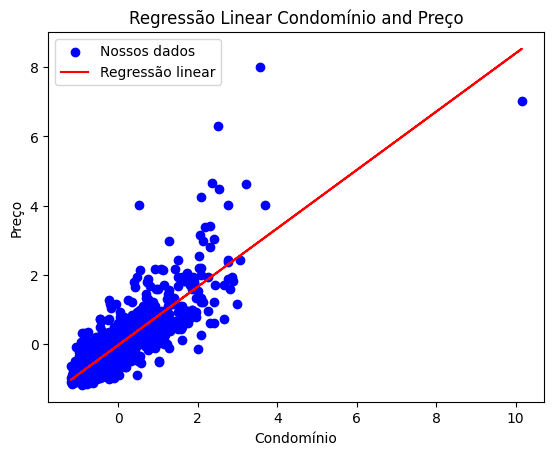

In [42]:
predicaoPreco3 = modeloCondoVSPreco.predict(condoX)

plt.scatter(condoX, preco3Y, color='blue', label='Nossos dados')
plt.plot(condoX, predicaoPreco3, color='red', label='Regressão linear')
plt.xlabel(nomeColX)
plt.ylabel(nomeColY)
plt.title('Regressão Linear ' + nomeColX + ' and ' + nomeColY)
plt.legend()
plt.show()

Aqui vamos calcular o loss do nosso modelo.

In [43]:
# calcula loss
loss = np.sum((preco3Y - predicaoPreco3) ** 2)

print("Loss =", loss)

Loss = 270.8918072523021


Aqui vamos calcular o erro quadrado médio

In [44]:
# calcula erro medio quadrado
EMQ3 = np.mean((preco3Y - predicaoPreco3) ** 2)

print("Erro Médio Quadrado =", EMQ3)

Erro Médio Quadrado = 0.3146246309550547


Aqui vamos calcular o Rˆ2 do nosso modelo

In [45]:
R2 = modeloCondoVSPreco.score(condoX, preco3Y)

# Print the R²
print("R² =", R2)

R² = 0.6925031236530687


# Regressão Linear Múltipla
Agora vamos fazer a regressão linear múltipla dos nossos dados.

### Levando em consideração o bairro
Acreditamos que o bairro em que o apartamento está localizado tem um impacto grande no preço do imóvel. Entretanto, por ser essa uma variável categórica, não seria possível utilizá-la na nossa regressão.

Para resolver esse problema buscamos um dado numérico que pudesse resumir o impacto do bairro. Usaremos o IQVU (Índice de Qualidade de Vida Urbana) com essa finalidade. Acreditamos que ele descreve bem essa influência do bairro ao levar em conta aspectos gerais da qualidade de vida naquele bairro, como número de comércios no bairro, postos de saúde, saneamento básico, entre outros inúmeros aspectos.

Importando os dados de IQVU por bairro

In [96]:
url = 'https://raw.githubusercontent.com/FredericoBaker/Decisao-Imoveis-Scrapping/main/iqvu_bh.csv' # Mudar depois que subir para o GitHub
dfIQVU = pd.read_csv(url)

# Renomeando a coluna NOMEUP
dfIQVU.rename(columns = {'NOMEUP':'Bairro'}, inplace = True)
dfIQVU.head()

,Bairro,IQVU
0,Abilio Machado,0.714309
1,Anchieta,0.755254
2,Antonio Carlos,0.709897
3,Bairro das Industrias,0.753676
4,Baleia,0.705870


Adicionando uma nova coluna no dataframe com o IQVU correspondente àquele bairro

In [97]:
# Exclui os espaços em branco no fim do nome do bairro
dfResidencial['Bairro'] = dfResidencial['Bairro'].str.rstrip()

dfResidencialIQVU = dfResidencial.merge(dfIQVU, how = 'left', on = 'Bairro')
dfResidencialIQVU.head()

,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,IQVU
0,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,0.0,2.0,2.0,1.0,2.0,NaN,NaN,915000.0,0.775673
1,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,0.0,2.0,2.0,1.0,2.0,NaN,NaN,883000.0,0.775673
2,"Apartamento 2 Quartos à venda, Serra - Belo Ho...",Apartamento,Carmo,"530,Rua Monte Alegre,Serra,Belo Horizonte",72.00,0.0,2.0,2.0,2.0,2.0,NaN,NaN,700000.0,0.775673
3,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,Carmo,"131,Rua Serranos,Serra,Belo Horizonte",220.00,0.0,4.0,2.0,2.0,4.0,1246.23,2850.0,1890000.0,0.775673
4,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,Carmo,"204,Rua Henrique Passini,Serra,Belo Horizonte",136.39,0.0,4.0,3.0,2.0,4.0,NaN,NaN,1944300.0,0.775673


Teremos que fazer algumas alterações antes de continuarmos, já que os nossos dados de condomínio, IPTU e IQVU possuem valores nulos.

In [98]:
dfResidencialIQVU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Título          1155 non-null   object 
 1   Tipo Imóvel     1155 non-null   object 
 2   Bairro          1155 non-null   object 
 3   Endereço        1155 non-null   object 
 4   Área interna    1155 non-null   float64
 5   Área externa    1155 non-null   float64
 6   # de quartos    1155 non-null   float64
 7   # de banheiros  1155 non-null   float64
 8   # de suítes     1155 non-null   float64
 9   # de vagas      1155 non-null   float64
 10  IPTU            826 non-null    float64
 11  Condomínio      861 non-null    float64
 12  Preço           1155 non-null   float64
 13  IQVU            1101 non-null   float64
dtypes: float64(10), object(4)
memory usage: 135.4+ KB


Para podermos gerar nosso modelo de regressão linear será necessário excluir as linhas que possuem esses valores nulos.

In [99]:
dfResidencialIQVU = dfResidencialIQVU.dropna(subset=['IPTU','Condomínio','IQVU'])
dfResidencialIQVU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 3 to 1154
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Título          778 non-null    object 
 1   Tipo Imóvel     778 non-null    object 
 2   Bairro          778 non-null    object 
 3   Endereço        778 non-null    object 
 4   Área interna    778 non-null    float64
 5   Área externa    778 non-null    float64
 6   # de quartos    778 non-null    float64
 7   # de banheiros  778 non-null    float64
 8   # de suítes     778 non-null    float64
 9   # de vagas      778 non-null    float64
 10  IPTU            778 non-null    float64
 11  Condomínio      778 non-null    float64
 12  Preço           778 non-null    float64
 13  IQVU            778 non-null    float64
dtypes: float64(10), object(4)
memory usage: 91.2+ KB


### Normalização dos dados
Para seguir em frente normalizaremos os dados, assim como fizemos para a regressão linear.

In [100]:
# criamos um novo dataframe para armazenar os dados redimensionados
dfNormalized = pd.DataFrame()

# selecionamos apenas colunas numericas para redimensionamento
numericColumns = dfResidencialIQVU.select_dtypes(include=np.number).columns

# calculamos a media e o desvio padrao das colunas numericas
means = dfResidencialIQVU[numericColumns].mean()
stds = dfResidencialIQVU[numericColumns].std()

# z normalizamos as colunas numericas e armazenamos no nosso novo dataframe
dfNormalized[numericColumns] = (dfResidencialIQVU[numericColumns] - means) / stds

dfNormalized.head()

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,IQVU
3,1.278748,-0.065803,0.898039,-0.364173,1.091209,1.842957,2.001620,1.990596,0.881052,-0.088689
9,-0.462007,-0.065803,-0.376914,-0.364173,-0.241539,-1.079232,-0.983566,-0.993749,-0.899523,-0.079643
12,0.245659,-0.065803,0.898039,2.132097,1.091209,0.868894,0.267824,-0.201984,1.076183,-0.079643
13,0.219094,1.638519,-0.376914,-0.364173,-0.241539,-1.079232,-0.469566,-0.105803,-0.582434,-0.079643
14,-1.156390,-0.065803,-1.651867,-1.612308,-1.574288,-1.079232,-0.931388,-0.841486,-0.984893,0.252640


Como esperado temos a média em torno de 0 e o desvio padrão igual a 1

In [102]:
dfNormalized.describe()

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,IQVU
count,7.780000e+02,7.780000e+02,7.780000e+02,7.780000e+02,7.780000e+02,7.780000e+02,7.780000e+02,7.780000e+02,7.780000e+02,7.780000e+02
mean,-1.415606e-16,1.369941e-17,6.849705e-17,2.054912e-16,4.109823e-17,3.196529e-17,1.004623e-16,-8.219646e-17,7.306352e-17,2.064044e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.485503e+00,-6.580315e-02,-2.926820e+00,-1.612308e+00,-1.574288e+00,-2.053294e+00,-1.200736e+00,-1.261731e+00,-1.155633e+00,-6.304017e+00
25%,-7.136376e-01,-6.580315e-02,-3.769142e-01,-3.641730e-01,-2.415393e-01,-1.079232e+00,-7.288691e-01,-7.988528e-01,-7.153673e-01,-4.500261e-01
50%,-2.226253e-01,-6.580315e-02,-3.769142e-01,-3.641730e-01,-2.415393e-01,-1.051687e-01,-2.906382e-01,-2.797840e-01,-2.775412e-01,-7.964294e-02
75%,4.589550e-01,-6.580315e-02,8.980390e-01,8.839618e-01,-2.415393e-01,8.688941e-01,3.848730e-01,5.013316e-01,4.054187e-01,9.085072e-01
max,5.927647e+00,2.546920e+01,2.172992e+00,3.380231e+00,3.756707e+00,5.739208e+00,6.130378e+00,3.877322e+00,8.088718e+00,2.701945e+00


### Execução da Regressão Linear Múltipla
Agora vamos encontrar os parâmetros alpha e beta do modelo ótimo de regressão linear.

In [103]:
# atributo que queremos prever
colunaY = dfNormalized['Preço']
# atributos que influenciam o atributo que queremos prever
colunaX = dfNormalized[['Área interna',	'Área externa',	'# de quartos',	'# de banheiros',	'# de suítes',	'# de vagas',	'IPTU',	'Condomínio', 'IQVU']]

# encontra o modelo de regressão linear ótima para os dados
modeloMult = LinearRegression()
modeloMult.fit(colunaX, colunaY)

# encontra os parâmetros do nosso modelo
coeficientes = modeloMult.coef_
intercepto = modeloMult.intercept_

print("Coeficientes =", coeficientes)
print("Intercepto =", intercepto)

Coeficientes = [ 0.24827378 -0.00343254 -0.05639682  0.04043205  0.09108249  0.06121751
  0.51064235  0.11813596  0.01314091]
Intercepto = 2.939736295753616e-17


Aqui vamos calcular o loss do nosso modelo.

In [104]:
predicaoPrecoMult = modeloMult.predict(colunaX)

# calcula loss
lossMult = np.sum((colunaY - predicaoPrecoMult) ** 2)

print("Loss =", lossMult)

Loss = 106.95787241491283


Aqui vamos calcular o erro quadrado médio

In [105]:
# calcula erro medio quadrado
EMQMult = np.mean((colunaY - predicaoPrecoMult) ** 2)

print("Erro Médio Quadrado =", EMQMult)

Erro Médio Quadrado = 0.13747798510914244


Aqui vamos calcular o Rˆ2 do nosso modelo

In [106]:
R2 = modeloMult.score(colunaX, colunaY)

# Print the R²
print("R² =", R2)

R² = 0.8623450805470878


### Testando nosso Modelo Com Alguns Exemplos

In [108]:
dfResidencialIQVU

#means = dfResidencial.drop('Preço', axis=1).mean()
#means1 = dfResidencial.mean()
means2 = dfResidencialIQVU.drop('Preço', axis=1).mean()

#print(means1)
print(means2)
#print(means3)

Área interna       133.354640
Área externa         1.544383
# de quartos         3.295630
# de banheiros       2.291774
# de suítes          1.181234
# de vagas           2.107969
IPTU               477.085861
Condomínio        1215.818882
IQVU                 0.778245
dtype: float64


<ipython-input-108-60f9f20e0a77>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means2 = dfResidencialIQVU.drop('Preço', axis=1).mean()


In [118]:
"""TEST"""
# Link: https://www.vivareal.com.br/imovel/apartamento-3-quartos-luxemburgo-bairros-belo-horizonte-com-garagem-95m2-venda-RS590000-id-2639282255/
# Preço Real: R$ 590.000,00

# Área interna
arInt = 95
# Área externa
arExt = 0
# num de quartos
numQ = 3
# num de banheiros
numB = 2
# num de suítes
numS = 1
# num de vagas
numV = 2
# IPTU
iptu = 362
# Condomínio
cond = 485
# IQVU -> Bairro: Luxemburgo
iqvu = 0.765196443

#lista dos atributos
atributos = [[arInt, arExt, numQ, numB, numS, numV, iptu, cond, iqvu]]

dfAtributos = pd.DataFrame(atributos, columns=['Área interna', 'Área externa', '# de quartos', '# de banheiros', '# de suítes', '# de vagas', 'IPTU', 'Condomínio', 'IQVU'])

# calculamos a media e o desvio padrao das colunas numericas
means = dfResidencialIQVU[numericColumns].drop('Preço', axis=1).mean()
stds = dfResidencialIQVU[numericColumns].drop('Preço', axis=1).std()

# z normalizamos as colunas numericas e armazenamos no nosso novo dataframe
dfAtributos = (dfAtributos - means) / stds

# predição preço
precoEst = modeloMult.predict(dfAtributos)

preco_mean = dfResidencialIQVU['Preço'].mean()
preco_std = dfResidencialIQVU['Preço'].std()

precoEst_original_scale = (precoEst * preco_std) + preco_mean

precoEst_formatted = round(precoEst_original_scale[0], 2)

precoEst_formatted


818078.92

In [56]:
means = dfResidencial[numericColumns].mean()
stds = dfResidencial[numericColumns].std()

# Unnormalize the data and store it in a new DataFrame
dfUnnormalized = pd.DataFrame()
dfUnnormalized[numericColumns] = dfNormalized[numericColumns] * stds + means

dfUnnormalized

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
0,63.81,0.0,2.0,2.0,1.0,2.0,NaN,NaN,915000.0
1,65.10,0.0,2.0,2.0,1.0,2.0,NaN,NaN,883000.0
2,72.00,0.0,2.0,2.0,2.0,2.0,NaN,NaN,700000.0
3,220.00,0.0,4.0,2.0,2.0,4.0,1246.23,2850.0,1890000.0
4,136.39,0.0,4.0,3.0,2.0,4.0,NaN,NaN,1944300.0
...,...,...,...,...,...,...,...,...,...
1151,76.89,0.0,3.0,2.0,1.0,1.0,NaN,NaN,492550.3
1152,71.45,0.0,1.0,1.0,1.0,2.0,NaN,NaN,970000.0
1153,158.08,0.0,3.0,2.0,1.0,4.0,319.34,399.0,937784.1
1154,77.74,0.0,3.0,2.0,1.0,2.0,319.34,399.0,585000.0
